In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt

from DesignMat import Gaussian
from Regressor import Bayesian

np.random.seed(1234)

def sinusoidal(x):
    return np.sin(2 * np.pi * x)
  
def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

We use polynomial curve fitting as an illustration of the predictive distribution for Bayesian linear regression models

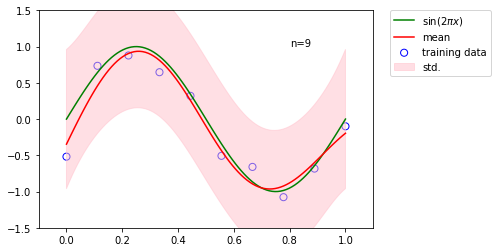

In [2]:
x_train, t_train = create_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

phi_train = Gaussian(np.linspace(0, 1, 9), 0.1).dm(x_train)
phi_test  = Gaussian(np.linspace(0, 1, 9), 0.1).dm(x_test)

t, t_std = Bayesian(alpha=2e-3, beta=2).fit(phi_train, t_train).predict_dist(phi_test)

plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, t_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, t, c="r", label="mean")
plt.fill_between(x_test, t_test - t_std, t_test + t_std, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("n=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()

Following the above example, we show the predictive distribution for Bayesian linear regression models by sequentially learning data points

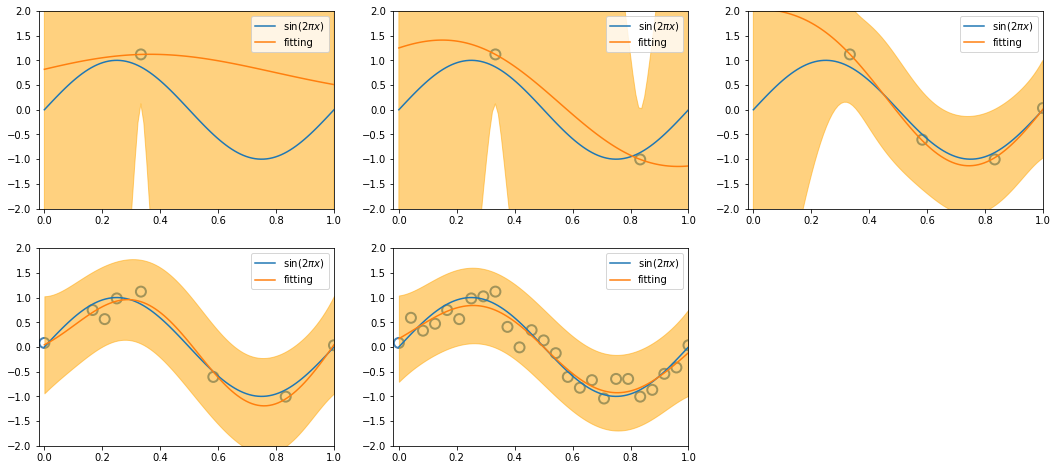

In [3]:
x_train, t_train = create_data(sinusoidal, 25, 0.25)
x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

phi_train = Gaussian(np.linspace(0, 1, 9), 0.1).dm(x_train)
phi_test  = Gaussian(np.linspace(0, 1, 9), 0.1).dm(x_test)

model = Bayesian(alpha=2e-3, beta=2)

plt.figure(figsize=(18, 8))
for i, [beg, end] in enumerate([[0, 1], [1, 2], [2, 4], [4, 8], [8, 25]]):
    t, t_std = model.fit(phi_train[beg: end], t_train[beg: end]).predict_dist(phi_test)
    
    plt.subplot(2,3,i+1)
    
    plt.scatter(x_train[:end], t_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=2)
    plt.plot(x_test, t_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, t, label="fitting")
    plt.fill_between(x_test, t - t_std, t + t_std, color="orange", alpha=0.5)
    plt.xlim(-0.02, 1)
    plt.ylim(-2, 2)
    plt.legend()
plt.show()